In [29]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np



In [30]:
# Add the root directory to sys.path
sys.path.append(os.path.abspath('..'))

from scripts.model_data_process import data_load , missing_values, delete_unwanted_column , delete_duplicated_rows , object_to_number , lable_encoding  , one_hot_encoding, target_variable_and_features , train_test_split_selection , feature_scaling , show_duplicated_rows
#importing the model building functions

from scripts.Statistical_Modeling import model_building, define_parameter_grid_gridsearchcv , train_each_model_by_gridsearchcv  , train_each_model, model_Test
from scripts.Feature_importance import shap_for_XGBoost , shap_for_random_forest , shap_for_decision_tree,shap_for_linear_regression

In [31]:
path = '../data/data.csv'

data = data_load(path)
data.head()

c:\Users\HP\Desktop\10 acd\week-3\scripts\model_data_process.py:10: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
1,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
2,145247,12827,2015-01-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,0.0
3,145247,12827,2015-08-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
4,145245,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1.009474,0.0


In [32]:
data.columns


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [33]:
len(data.columns)

52

In [34]:
columns_to_drop = ['UnderwrittenCoverID', 'PolicyID', 'NumberOfDoors', 
                   'VehicleIntroDate', 'IsVATRegistered', 'Title', 
                   'LegalType', 'Language']
data1 =delete_unwanted_column(data , columns_to_drop)
data1.columns

Index(['TransactionMonth', 'Citizenship', 'Bank', 'AccountType',
       'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [35]:
len(data1.columns)

44

In [36]:
missing_values(data1)

TransactionMonth                 0
Citizenship                      0
Bank                             0
AccountType                      0
MaritalStatus                    0
Gender                           0
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                           0
VehicleType                      0
RegistrationYear                 0
make                             0
Model                            0
Cylinders                        0
cubiccapacity                    0
kilowatts                        0
bodytype                         0
CustomValueEstimate              0
AlarmImmobiliser                 0
TrackingDevice                   0
CapitalOutstanding               0
NewVehicle                       0
WrittenOff                       0
Rebuilt                          0
Converted           

In [37]:
data1.shape

(702143, 44)

In [38]:
dupes = show_duplicated_rows(data1)
print(dupes)

Number of duplicated rows: 188065
           TransactionMonth Citizenship           Bank      AccountType  \
1505    2015-04-01 00:00:00               Capitec Bank  Savings account   
1506    2015-06-01 00:00:00               Capitec Bank  Savings account   
1508    2015-08-01 00:00:00               Capitec Bank  Savings account   
1512    2015-05-01 00:00:00               Capitec Bank  Savings account   
1514    2015-07-01 00:00:00               Capitec Bank  Savings account   
...                     ...         ...            ...              ...   
702051  2014-11-01 00:00:00          ZA  Standard Bank  Current account   
702052  2015-01-01 00:00:00          ZA  Standard Bank  Current account   
702053  2015-04-01 00:00:00          ZA  Standard Bank  Current account   
702054  2015-06-01 00:00:00          ZA  Standard Bank  Current account   
702055  2015-08-01 00:00:00          ZA  Standard Bank  Current account   

        MaritalStatus         Gender       Country      Province 

In [39]:
data1 = delete_duplicated_rows(data1)
print(f"Duplicates after cleaning: {data1.duplicated().sum()}")  


Duplicates after cleaning: 0


In [40]:
data1.shape

(588650, 44)

In [41]:
data1.dtypes

TransactionMonth             object
Citizenship                  object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
CustomValueEstimate         float64
AlarmImmobiliser             object
TrackingDevice               object
CapitalOutstanding           object
NewVehicle                   object
WrittenOff                   object
Rebuilt                     

In [42]:
numeric_cols = ['CapitalOutstanding', 'NumberOfVehiclesInFleet', 'ExcessSelected']
data1 = object_to_number(data1,numeric_cols)
data1.dtypes

TransactionMonth             object
Citizenship                  object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
CustomValueEstimate         float64
AlarmImmobiliser             object
TrackingDevice               object
CapitalOutstanding          float64
NewVehicle                   object
WrittenOff                   object
Rebuilt                     

In [43]:
label_encoding_columns = [
    'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 
    'StatutoryClass', 'StatutoryRiskType', 'ExcessSelected','TransactionMonth', 'Citizenship', 'Bank', 'AccountType', 'MaritalStatus', 
    'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 
    'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 
    'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 
    'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 
    'NumberOfVehiclesInFleet', 'TermFrequency'
]
data1 = lable_encoding(data1,label_encoding_columns)

In [44]:
data1.head()

,TransactionMonth,Citizenship,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,21,0,2,0,1,2,0,2,1459,12,...,0,25,20,5,1,2,0,0,0.000000,0.0
1,21,0,2,0,1,2,0,2,1459,12,...,0,16,13,5,1,2,0,0,0.000000,0.0
2,15,0,2,0,1,2,0,2,1459,12,...,0,21,18,5,1,2,0,0,3.256435,0.0
3,22,0,2,0,1,2,0,2,1459,12,...,0,21,18,5,1,2,0,0,0.000000,0.0
4,17,0,2,0,1,2,0,2,1459,12,...,0,17,14,5,1,2,0,0,1.009474,0.0


In [45]:
# Perform label encoding
data1 = lable_encoding(data1, label_encoding_columns)
# Check the unique values in the TotalClaims column of the encoded DataFrame
print(data1['TotalClaims'].unique())

[0.]


In [61]:
X , y_claims = target_variable_and_features(data1)
y_claims.value_counts()

TotalClaims
0.0    588650
Name: count, dtype: int64

In [77]:
print(data1['TotalClaims'].value_counts())


TotalClaims
0.0    588650
Name: count, dtype: int64


In [62]:
x_train , x_test ,  y_train_claims , y_test_claims  = train_test_split_selection(X,y_claims)
#x_trian_scaled ,x_test_scaled = feature_scaling(x_train,x_test)

In [65]:
lr_model, dt_model, rfr_model, xgb_model = model_building()


In [66]:
lr_grid, dt_grid, rf_grid, xgb_grid = define_parameter_grid_gridsearchcv(lr_model, dt_model, rfr_model, xgb_model)


In [67]:
lr_model, dt_model, rfr_model, xgb_model = train_each_model(lr_model, dt_model, rfr_model, xgb_model, x_trian_scaled, y_train_claims)

finfish lr
finfish dt
finfish rfr
finfish xgb


In [71]:
# Evaluate the Linear Regression model
mae, mse, r2, y_pred = model_Test(lr_model, x_test_scaled, y_test_claims)

# Print the evaluation metrics
print("Linear Regression - MAE:", mae, "MSE:", mse, "R2:", r2)

Linear Regression - MAE: 0.0 MSE: 0.0 R2: 1.0


In [72]:
mae , mse , r2 , y_pred



(0.0, 0.0, 1.0, array([0., 0., 0., ..., 0., 0., 0.], shape=(117730,)))

In [73]:
mae



0.0

In [74]:
mse



0.0

In [55]:
r2



1.0

In [56]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(117730,))

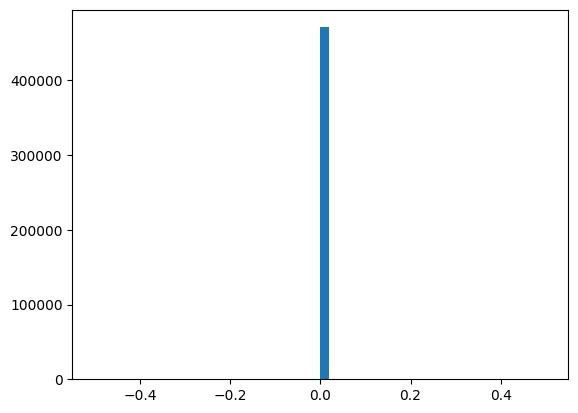

In [57]:
plt.hist(y_train_claims, bins=50)
plt.show()

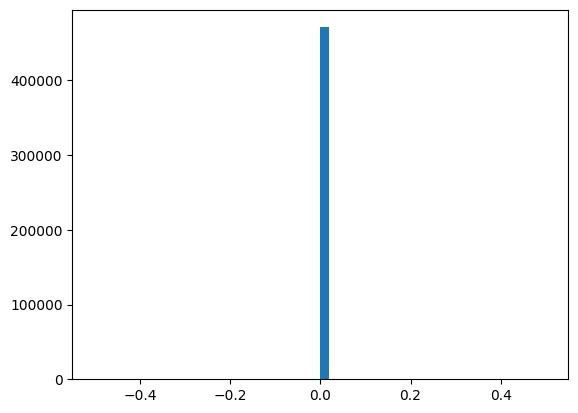

In [58]:
y_train_claims_log = np.log1p(y_train_claims)  # Applies log(1 + x) to avoid issues with zeros
plt.hist(y_train_claims_log, bins=50)
plt.show()

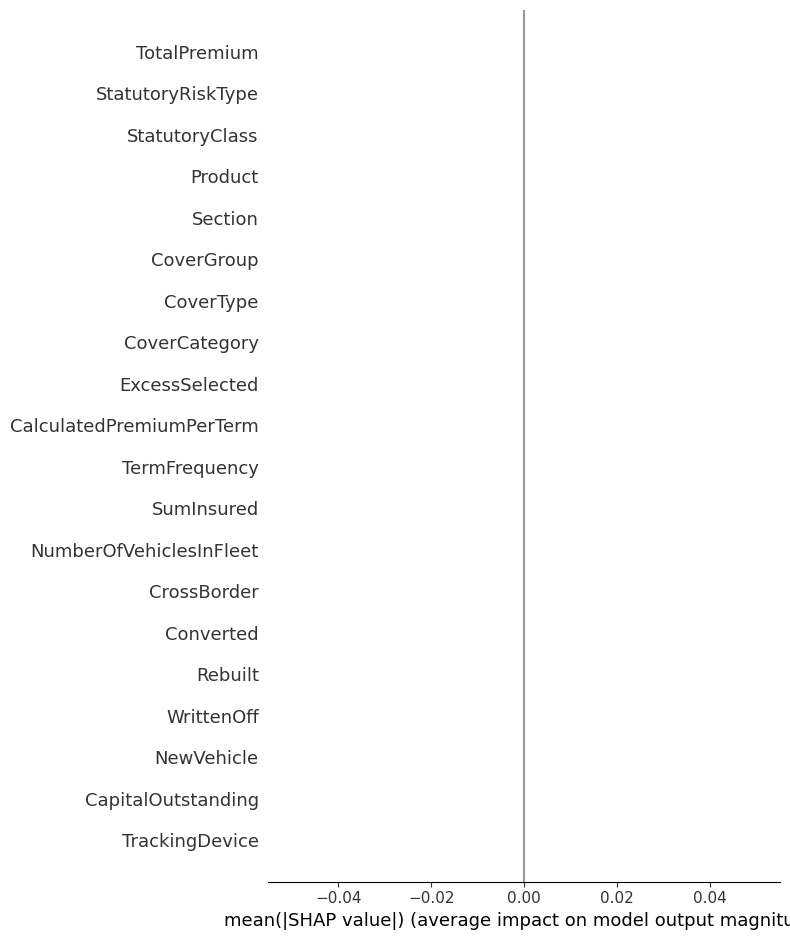

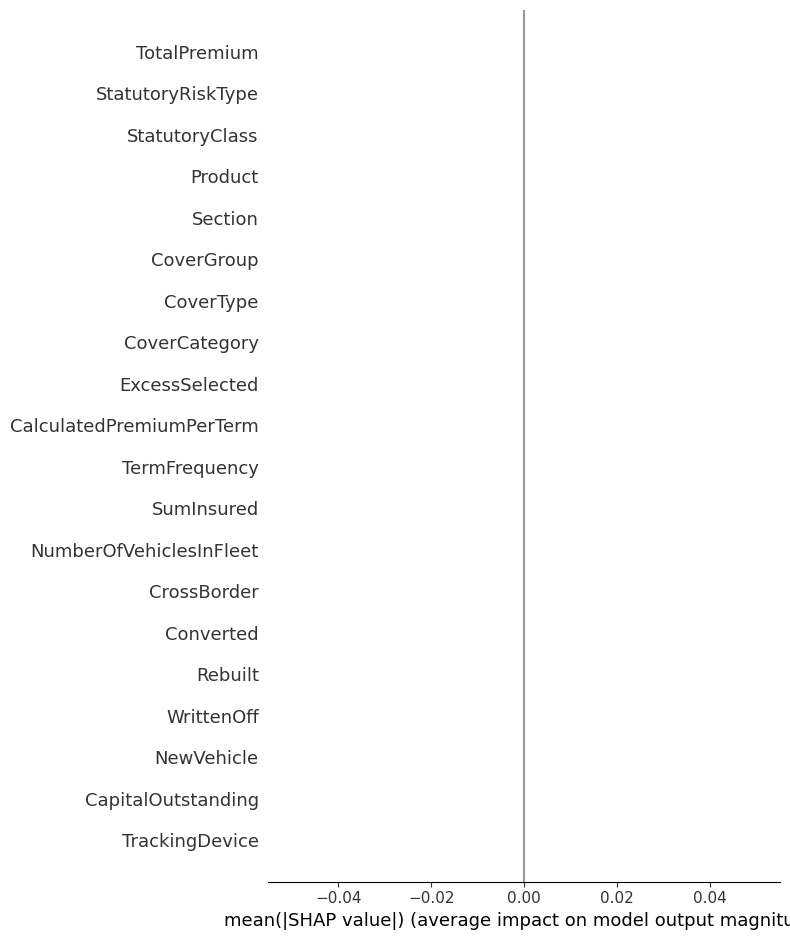

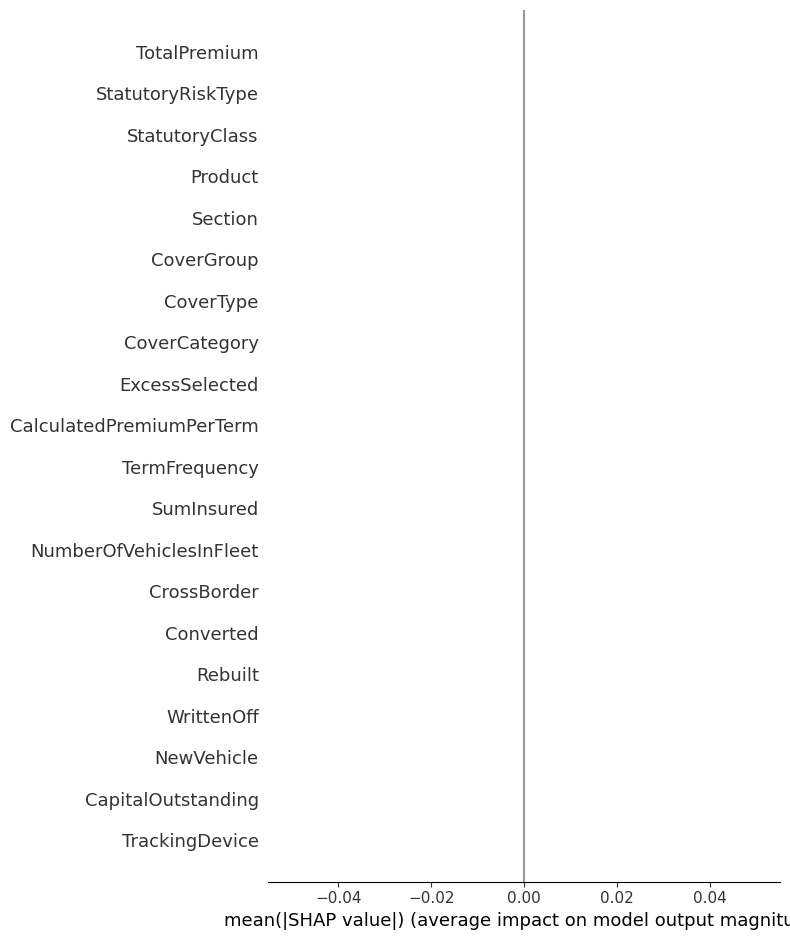

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: LinearRegression()

In [59]:
shap_for_XGBoost(xgb_model,x_test)
shap_for_random_forest(rfr_model,x_test)
shap_for_decision_tree(dt_model,x_test)
shap_for_linear_regression(lr_model,x_test)

In [60]:
print("Unique values in y_test_claims:", np.unique(y_test_claims))


Unique values in y_test_claims: [0.]
